# Imports

In [1]:
import os

os.chdir('C:\\Users\\denis\\Documents\\GitHub\\COS398_CatanAI')

In [2]:
import numpy as np

In [3]:
from NEAT.population import Population
from NEAT.species import Species
from NEAT.organism import Organism
from NEAT.history import InnovationHistory
from Circuit_Design.circuit_games import XORGame

# Generation

## Mutation

State
Neurons: 3 (2), {0: [N(0), N(1)], 1: [N(2)]}
Connections: 0, []



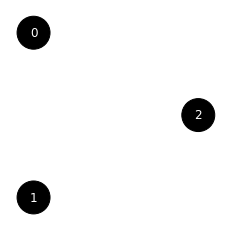

In [4]:
population = Population(1000, 1, 1)
population.innovation_history = InnovationHistory(population.num_inputs + population.num_outputs + 2) 
player1 = Organism(1, 1)
player1.print_state()
player1.draw_state()

State
Neurons: 3 (2), {0: [N(0), N(1)], 1: [N(2)]}
Connections: 1, [C(N(0)->N(2),W=-0.2440,I=1,E=1)]

[(0, 2)]


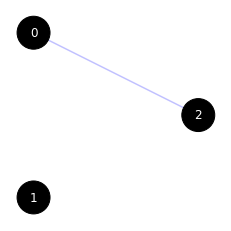

In [5]:
population.mutate_genome(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 3 (2), {0: [N(0), N(1)], 1: [N(2)]}
Connections: 1, [C(N(0)->N(2),W=-0.2440,I=1,E=1)]

[(0, 2)]


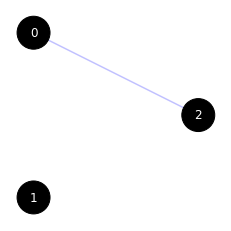

In [6]:
population.mutate_neuron(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 3 (2), {0: [N(0), N(1)], 1: [N(2)]}
Connections: 2, [C(N(0)->N(2),W=-0.2440,I=1,E=1), C(N(1)->N(2),W=0.5888,I=2,E=1)]

[(0, 2), (1, 2)]


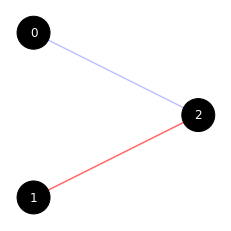

In [7]:
population.mutate_gene(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 4 (3), {0: [N(0), N(1)], 1: [N(4)], 2: [N(2)]}
Connections: 5, [C(N(0)->N(2),W=-0.2440,I=1,E=1), C(N(1)->N(2),W=0.5888,I=2,E=0), C(N(1)->N(4),W=1.0000,I=3,E=1), C(N(4)->N(2),W=0.5888,I=4,E=1), C(N(0)->N(4),W=0.0000,I=5,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4)]


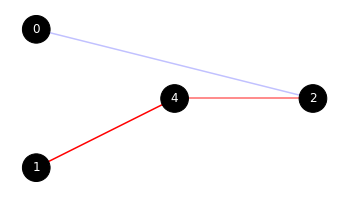

In [8]:
population.mutate_neuron(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 4 (3), {0: [N(0), N(1)], 1: [N(4)], 2: [N(2)]}
Connections: 5, [C(N(0)->N(2),W=-0.2349,I=1,E=1), C(N(1)->N(2),W=0.6209,I=2,E=0), C(N(1)->N(4),W=0.9979,I=3,E=1), C(N(4)->N(2),W=0.5966,I=4,E=1), C(N(0)->N(4),W=0.0476,I=5,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4)]


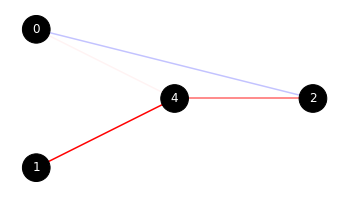

In [9]:
population.mutate_genome(player1)
player1.print_state()
player1.draw_state()
print(population.innovation_history.innovations)

## Cloning

State
Neurons: 4 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4)]}
Connections: 5, [C(N(0)->N(2),W=-0.2349,I=1,E=1), C(N(1)->N(2),W=0.6209,I=2,E=0), C(N(1)->N(4),W=0.9979,I=3,E=1), C(N(4)->N(2),W=0.5966,I=4,E=1), C(N(0)->N(4),W=0.0476,I=5,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4)]


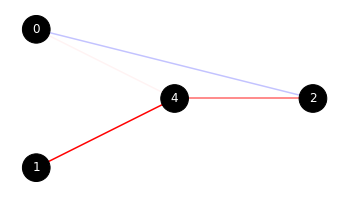

In [10]:
player2 = population.clone(player1)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4), N(5)]}
Connections: 8, [C(N(0)->N(2),W=-0.2349,I=1,E=1), C(N(1)->N(2),W=0.6209,I=2,E=0), C(N(1)->N(4),W=0.9979,I=3,E=1), C(N(4)->N(2),W=0.5966,I=4,E=1), C(N(0)->N(4),W=0.0476,I=5,E=1), C(N(1)->N(5),W=1.0000,I=6,E=1), C(N(5)->N(2),W=0.6209,I=7,E=1), C(N(0)->N(5),W=0.0000,I=8,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4), (1, 5), (5, 2), (0, 5)]


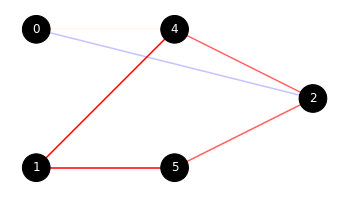

In [11]:
population.mutate_neuron(player2)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4), N(5)]}
Connections: 8, [C(N(0)->N(2),W=-0.2349,I=1,E=1), C(N(1)->N(2),W=0.6209,I=2,E=0), C(N(1)->N(4),W=0.9979,I=3,E=1), C(N(4)->N(2),W=0.5966,I=4,E=1), C(N(0)->N(4),W=0.0476,I=5,E=1), C(N(1)->N(5),W=1.0000,I=6,E=1), C(N(5)->N(2),W=0.6209,I=7,E=1), C(N(0)->N(5),W=0.0000,I=8,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4), (1, 5), (5, 2), (0, 5)]


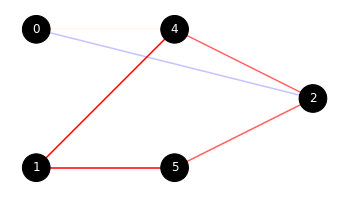

In [12]:
population.mutate_gene(player2)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4), N(5)]}
Connections: 8, [C(N(0)->N(2),W=-0.2444,I=1,E=1), C(N(1)->N(2),W=0.6014,I=2,E=0), C(N(1)->N(4),W=1.0000,I=3,E=1), C(N(4)->N(2),W=0.5928,I=4,E=1), C(N(0)->N(4),W=0.0502,I=5,E=1), C(N(1)->N(5),W=1.0000,I=6,E=1), C(N(5)->N(2),W=0.6034,I=7,E=1), C(N(0)->N(5),W=-0.0107,I=8,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4), (1, 5), (5, 2), (0, 5)]


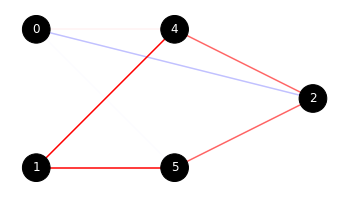

In [13]:
population.mutate_weights(player2)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

State
Neurons: 5 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4), N(5)]}
Connections: 8, [C(N(0)->N(2),W=-0.2313,I=1,E=1), C(N(1)->N(2),W=0.5838,I=2,E=0), C(N(1)->N(4),W=1.0000,I=3,E=1), C(N(4)->N(2),W=0.5651,I=4,E=1), C(N(0)->N(4),W=0.0490,I=5,E=1), C(N(1)->N(5),W=0.9200,I=6,E=1), C(N(5)->N(2),W=0.6246,I=7,E=1), C(N(0)->N(5),W=0.0076,I=8,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4), (1, 5), (5, 2), (0, 5)]


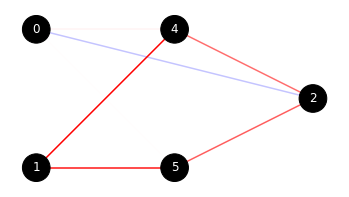

In [14]:
population.mutate_genome(player2)
player2.print_state()
player2.draw_state()
print(population.innovation_history.innovations)

## Crossover

State
Neurons: 4 (3), {0: [N(0), N(1)], 2: [N(2)], 1: [N(4)]}
Connections: 5, [C(N(0)->N(2),W=-0.2349,I=1,E=1), C(N(1)->N(2),W=0.6209,I=2,E=0), C(N(1)->N(4),W=1.0000,I=3,E=1), C(N(4)->N(2),W=0.5966,I=4,E=1), C(N(0)->N(4),W=0.0476,I=5,E=1)]

[(0, 2), (1, 2), (1, 4), (4, 2), (0, 4), (1, 5), (5, 2), (0, 5)]


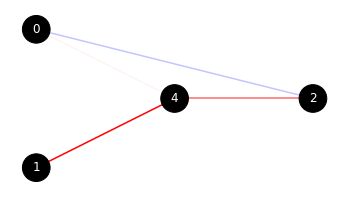

In [15]:
player1.fitness = 1
player2.fitness = 0
player3 = population.crossover(player1, player2)
player3.print_state()
player3.draw_state()
print(population.innovation_history.innovations)

In [16]:
player1.fitness = 0
player2.fitness = 1
player4 = population.crossover(player1, player2)
player4.print_state()
player4.draw_state()
print(population.innovation_history.innovations)

AttributeError: type object 'Species' has no attribute 'crossover'

## Species

State
Neurons: 3 (2), {0: [N(0), N(1)], 1: [N(2)]}
Connections: 2, [C(N(0)->N(2),W=-0.2642,I=4,E=1), C(N(1)->N(2),W=0.9483,I=0,E=1)]



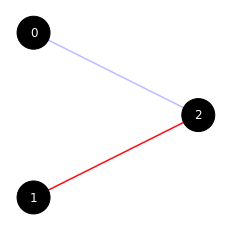

In [ ]:
player5 = Organism(1, 1)
for _ in range(25):
    population.mutate_genome(player5)
player5.print_state()
player5.draw_state()

# Evaluation

State
Neurons: 5 (3), {0: [N(0), N(1)], 1: [N(4), N(5)], 2: [N(2)]}
Connections: 8, [C(N(1)->N(2),W=0.5973,I=1,E=0), C(N(1)->N(4),W=-0.7733,I=2,E=1), C(N(0)->N(4),W=0.0199,I=4,E=1), C(N(0)->N(2),W=0.5130,I=5,E=1), C(N(1)->N(5),W=0.3372,I=6,E=1), C(N(0)->N(5),W=-0.0338,I=8,E=1), C(N(4)->N(2),W=0.6212,I=3,E=1), C(N(5)->N(2),W=0.6025,I=7,E=1)]

1
0.5
-0.36671132113032
0.13478820261352403
1.088804420434575
[0.7481565193300042]


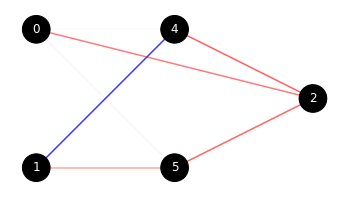

In [ ]:
output = player1.output([1, 0.5])
player1.print_state()
player1.draw_state()

for layer_neurons in player1.neurons.values():
    for neuron in layer_neurons:
        print(neuron.input_value)
print(output)

# Training

In [ ]:
def population_info(population):
    return "Players: %d\n" % len(population.players) + \
    "Species: %d\n" % len(population.species) + \
    "Innovations: %d\n" % len(population.innovation_history.innovations) + \
    "Species Threshold: %.4f" % population.species_threshold

def species_info(i):
    return "Species %d - " % i + \
    "Players: %d, " % len(population.species[i].players) + \
    "Average Fitness: %.4f, " % population.species[i].average_fitness + \
    "Max Fitness: %.4f, " % population.species[i].fittest_player.fitness + \
    "Max Fitness Ever: %.4f, " % population.species[i].max_fitness + \
    "Fittest Innovations: %d, " % len(population.species[i].fittest_player.innovation_labels) + \
    "Staleness: %d" % population.species[i].staleness

In [ ]:
population = Population(1000, 2, 2)

for _ in range(5):
    population.new_generation()
    won = XORGame(100).play_game(population.players)
    for i in range(len(population.players)):
        population.players[i].set_fitness(won[i])
    population.update_generation()
    print(len(population.players))
    print(population_info(population))
    for i in range(len(population.species)):
        print(species_info(i))

500
Players: 500
Species: 2
Innovations: 6
Species Threshold: 3.0000
Species 0 - Players: 980, Average Fitness: 50.1296, Max Fitness: 65.0000, Max Fitness Ever: 65.0000, Fittest Innovations: 1, Staleness: 0
Species 1 - Players: 20, Average Fitness: 49.5000, Max Fitness: 60.0000, Max Fitness Ever: 60.0000, Fittest Innovations: 1, Staleness: 0
501
Players: 501
Species: 1
Innovations: 82
Species Threshold: 3.0000
Species 0 - Players: 1002, Average Fitness: 50.1158, Max Fitness: 83.0000, Max Fitness Ever: 83.0000, Fittest Innovations: 2, Staleness: 0


In [ ]:
def training_stats(iteration, population):
    fitness = 0
    for player in population.players:
        fitness += player.fitness
    average_fitness = fitness / len(population.players)
    return "Iteration: %d, " % iteration + \
    "Population: %d, " % len(population.players) + \
    "Innovations: %d, " % len(population.innovation_history.innovations) + \
    "Species: %d, " % len(population.species) + \
    "Average Fitness: %.4f, " % average_fitness + \
    "Max Fitness: %.4f, " % population.max_fitness + \
    "Species Threshold: %.1f" % population.species_threshold

In [ ]:
num_iters = 25
print_step = 1
max_hits_threshold = 5
max_hits = 0
num_games = 100

population = Population(1000, 2, 2)

for iteration in range(num_iters):
    population.new_generation()
    wins = XORGame(num_games).play_game(population.players)
    for i in range(len(population.players)):
        population.players[i].set_fitness(wins[i])
    population.update_generation()
    if population.max_fitness == num_games:
        print(training_stats(iteration, population))
        max_hits += 1
    elif iteration % print_step == 0:
        print(training_stats(iteration, population))
        max_hits = 0
    else:
        max_hits = 0
    if max_hits == max_hits_threshold:
        break

Iteration: 0, Population: 500, Innovations: 6, Species: 2, Average Fitness: 53.7140, Max Fitness: 65.0000, Staleness Threshold: 3.0
Iteration: 1, Population: 501, Innovations: 132, Species: 2, Average Fitness: 54.7824, Max Fitness: 86.0000, Staleness Threshold: 3.0
Iteration: 2, Population: 498, Innovations: 211, Species: 2, Average Fitness: 54.9016, Max Fitness: 82.0000, Staleness Threshold: 3.0
Iteration: 3, Population: 498, Innovations: 330, Species: 3, Average Fitness: 55.6084, Max Fitness: 83.0000, Staleness Threshold: 3.0
Iteration: 4, Population: 497, Innovations: 464, Species: 4, Average Fitness: 56.8531, Max Fitness: 85.0000, Staleness Threshold: 3.0
Iteration: 5, Population: 498, Innovations: 642, Species: 4, Average Fitness: 62.0301, Max Fitness: 84.0000, Staleness Threshold: 3.0
Iteration: 6, Population: 499, Innovations: 801, Species: 4, Average Fitness: 60.5752, Max Fitness: 86.0000, Staleness Threshold: 3.0
Iteration: 7, Population: 498, Innovations: 985, Species: 4, Ave

In [ ]:
max_player = population.species[0].players[0]
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = max_player.decide(inputs)
    print(inputs, max_player.nn.forward_pass(inputs), decision)
max_player.nn.print_state()
max_player.nn.draw_state()

AttributeError: 'Organism' object has no attribute 'decide'